# Introduction


This coding assessment has 2 parts. It is very open-ended, and there is not a single correct response. There are many possible approaches; choose one or two rather than attacking the problem every possible way. Please document your data exploration and modeling process. Feel free to use any open source packages you desire, but don't rely too much on canned solutions. For example, using solely Facebook's Prophet to forecast does not give us a good idea of your level of expertise.

1. crime_pred.csv, containing your predictions for Part 1
2. market1_pred.csv, containing half your predictions for Part 2
3. market2_pred.csv, containing the other half of your predictions for Part 2
4. Any other relevant scripts you wrote to solve the problem

The required format for 2-4 will be explained below.


# Part 1

crime_2020.csv and crime_2021.csv contain real data on crime in Boston. Predict the number of vandalism incidents and the number of verbal disputes (OFFENSE_DESCRIPTION=="VANDALISM" or OFFENSE_DESCRIPTION=="VERBAL DISPUTE") for each day from July 9, 2021 to December 31, 2021. Save your predictions to a csv named crime_pred.csv, with the following format:

| Date | VANDALISM | VERBAL DISPUTE |
| --- | --- | --- |
| 2021-07-09 | prediction | prediction |
| --- | --- | --- |

Obviously, we can't assess your actual prediction accuracy. We will focus on your modeling decisions.

In [ ]:
# !pip install ipython-autotime

# %load_ext autotime

In [ ]:
## importing libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
# plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# **Exploring the time series forecast using SARIMA**

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.arima_model import ARIMA

* **Data Uploading, cleaning feature engineering and preprocessing for TSA**






In [ ]:
import pandas as pd
## uploading the data
crime_2021 = pd.read_csv('crime_2021.csv')
crime_2021 = crime_2021[(crime_2021['OFFENSE_DESCRIPTION']=="VANDALISM") | (crime_2021['OFFENSE_DESCRIPTION']=="VERBAL DISPUTE")]
crime_2021.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
4,212996778,3301,NaN,VERBAL DISPUTE,C6,204,0,2021-02-01 06:20:00,2021,2,Monday,6,NaN,GILLETTE PARK,42.344125,-71.056853,"(42.3441248392933, -71.0568533916328)"
27,212046473,3301,NaN,VERBAL DISPUTE,E18,516,0,2021-07-07 23:53:00,2021,7,Wednesday,23,NaN,NEPONSET AVE,42.296207,-71.054879,"(42.2962066695049, -71.0548785223855)"
40,212046455,3301,NaN,VERBAL DISPUTE,C6,207,0,2021-07-07 21:44:00,2021,7,Wednesday,21,NaN,SEAPORT BLVD,42.350827,-71.043418,"(42.3508268662159, -71.0434175813107)"
63,212046420,1402,NaN,VANDALISM,D4,150,0,2021-07-07 02:41:00,2021,7,Wednesday,2,NaN,APPLETON ST,42.345394,-71.073802,"(42.3453940583975, -71.0738024655648)"
81,212046396,3301,NaN,VERBAL DISPUTE,B2,183,0,2021-07-07 17:38:00,2021,7,Wednesday,17,NaN,DUDLEY ST,42.319871,-71.070963,"(42.3198707618137, -71.0709626304778)"


In [ ]:
crime_2021_vandalism = crime_2021[(crime_2021['OFFENSE_DESCRIPTION']=="VANDALISM") ]
crime_2021_vandalism.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
63,212046420,1402,NaN,VANDALISM,D4,150,0,2021-07-07 02:41:00,2021,7,Wednesday,2,NaN,APPLETON ST,42.345394,-71.073802,"(42.3453940583975, -71.0738024655648)"
100,212046375,1402,NaN,VANDALISM,A1,77,0,2021-07-07 10:00:00,2021,7,Wednesday,10,NaN,NEW SUDBURY ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
103,212046371,1402,NaN,VANDALISM,C11,355,0,2021-07-05 23:00:00,2021,7,Monday,23,NaN,GIBSON ST,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)"
147,212046300,1402,NaN,VANDALISM,B3,426,0,2021-07-07 12:03:00,2021,7,Wednesday,12,NaN,BLUE HILL AVE,42.269859,-71.093464,"(42.2698591613484, -71.0934635332552)"
160,212046284,1402,NaN,VANDALISM,A1,77,0,2021-07-07 10:53:00,2021,7,Wednesday,10,NaN,NEW SUDBURY ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"


In [ ]:
crime_2021_verbal = crime_2021[(crime_2021['OFFENSE_DESCRIPTION']=="VERBAL DISPUTE") ]
crime_2021_verbal.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
4,212996778,3301,NaN,VERBAL DISPUTE,C6,204,0,2021-02-01 06:20:00,2021,2,Monday,6,NaN,GILLETTE PARK,42.344125,-71.056853,"(42.3441248392933, -71.0568533916328)"
27,212046473,3301,NaN,VERBAL DISPUTE,E18,516,0,2021-07-07 23:53:00,2021,7,Wednesday,23,NaN,NEPONSET AVE,42.296207,-71.054879,"(42.2962066695049, -71.0548785223855)"
40,212046455,3301,NaN,VERBAL DISPUTE,C6,207,0,2021-07-07 21:44:00,2021,7,Wednesday,21,NaN,SEAPORT BLVD,42.350827,-71.043418,"(42.3508268662159, -71.0434175813107)"
81,212046396,3301,NaN,VERBAL DISPUTE,B2,183,0,2021-07-07 17:38:00,2021,7,Wednesday,17,NaN,DUDLEY ST,42.319871,-71.070963,"(42.3198707618137, -71.0709626304778)"
102,212046373,3301,NaN,VERBAL DISPUTE,E5,691,0,2021-07-07 16:15:00,2021,7,Wednesday,16,NaN,CENTRE ST,42.287094,-71.148221,"(42.2870935525911, -71.1482212837716)"


In [ ]:
crime_2020 = pd.read_csv('crime_2020.csv')
crime_2020 = crime_2020[(crime_2020['OFFENSE_DESCRIPTION']=="VANDALISM") | (crime_2020['OFFENSE_DESCRIPTION']=="VERBAL DISPUTE")]
crime_2020.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
30,212021101,1402,NaN,VANDALISM,C11,355,0,2020-10-05 00:00:00,2020,10,Monday,0,NaN,KING ST,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)"
120,202079121,1402,NaN,VANDALISM,E5,664,1,2020-10-26 13:45:00,2020,10,Monday,13,NaN,ARCHDALE RD,42.292673,-71.123293,"(42.2926731782789, -71.1232931129253)"
136,212009193,1402,NaN,VANDALISM,B2,181,0,2020-12-20 00:00:00,2020,12,Sunday,0,NaN,NORFOLK AVE,42.325877,-71.070249,"(42.3258765848214, -71.0702494665461)"
165,202071175,1402,NaN,VANDALISM,A7,28,0,2020-09-28 17:45:00,2020,9,Monday,17,NaN,COTTAGE ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
185,212006647,1402,NaN,VANDALISM,B3,463,0,2020-12-31 10:00:00,2020,12,Thursday,10,NaN,CALDER ST,42.297105,-71.088077,"(42.2971045178923, -71.0880773111089)"


In [ ]:
crime_2020_vandalism = crime_2020[(crime_2020['OFFENSE_DESCRIPTION']=="VANDALISM") ]
crime_2020_vandalism.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
30,212021101,1402,NaN,VANDALISM,C11,355,0,2020-10-05 00:00:00,2020,10,Monday,0,NaN,KING ST,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)"
120,202079121,1402,NaN,VANDALISM,E5,664,1,2020-10-26 13:45:00,2020,10,Monday,13,NaN,ARCHDALE RD,42.292673,-71.123293,"(42.2926731782789, -71.1232931129253)"
136,212009193,1402,NaN,VANDALISM,B2,181,0,2020-12-20 00:00:00,2020,12,Sunday,0,NaN,NORFOLK AVE,42.325877,-71.070249,"(42.3258765848214, -71.0702494665461)"
165,202071175,1402,NaN,VANDALISM,A7,28,0,2020-09-28 17:45:00,2020,9,Monday,17,NaN,COTTAGE ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
185,212006647,1402,NaN,VANDALISM,B3,463,0,2020-12-31 10:00:00,2020,12,Thursday,10,NaN,CALDER ST,42.297105,-71.088077,"(42.2971045178923, -71.0880773111089)"


In [ ]:
crime_2020_verbal = crime_2020[(crime_2020['OFFENSE_DESCRIPTION']=="VERBAL DISPUTE") ]
crime_2020_verbal.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
228,202055545,3301,NaN,VERBAL DISPUTE,B3,,0,2020-08-03 04:06:00,2020,8,Monday,4,NaN,FULLER ST,42.284826,-71.091374,"(42.2848257658049, -71.091373689388)"
447,202095650,3301,NaN,VERBAL DISPUTE,A7,907,0,2020-12-31 21:07:00,2020,12,Thursday,21,NaN,BORDER ST,42.370808,-71.042927,"(42.3708080469113, -71.0429270600897)"
475,202095664,3301,NaN,VERBAL DISPUTE,C6,,0,2020-12-31 22:31:00,2020,12,Thursday,22,NaN,DALESSIO CT,42.340115,-71.053390,"(42.3401146906078, -71.0533902862426)"
480,202095657,3301,NaN,VERBAL DISPUTE,A1,114,0,2020-12-31 20:50:00,2020,12,Thursday,20,NaN,CONGRESS ST,42.353007,-71.052893,"(42.3530074027023, -71.0528934405412)"
615,202095479,3301,NaN,VERBAL DISPUTE,B3,282,0,2020-12-31 11:44:00,2020,12,Thursday,11,NaN,WARNER ST,42.328663,-71.085634,"(42.3286628355561, -71.0856340118355)"


In [ ]:
crime_2020_verbal[['Date','Time']] = crime_2020_verbal.OCCURRED_ON_DATE.str.split(expand=True)
crime_2021_verbal[['Date','Time']] = crime_2021_verbal.OCCURRED_ON_DATE.str.split(expand=True)
crime_2020_vandalism[['Date','Time']] = crime_2020_vandalism.OCCURRED_ON_DATE.str.split(expand=True)
crime_2021_vandalism[['Date','Time']] = crime_2021_vandalism.OCCURRED_ON_DATE.str.split(expand=True)
# crime_2021_vandalism.head()

In [ ]:
## grouping the crime for each day
crime_2020_verbal_g = crime_2020_verbal['Date'].value_counts()
crime_2021_verbal_g=crime_2021_verbal['Date'].value_counts()
crime_2020_vandalism_g=crime_2020_vandalism['Date'].value_counts()
crime_2021_vandalism_g=crime_2021_vandalism['Date'].value_counts()

In [ ]:
crime_2021_vandalism_g.head()
crime_2021_vandalism_g1=pd.DataFrame(crime_2021_vandalism_g)
crime_2021_vandalism_g1.reset_index(inplace=True)
crime_2021_vandalism_g2 = crime_2021_vandalism_g1.rename(columns = {'index':'Date', 'Date':'Crime'})

# crime_2021_vandalism_g2.drop(columns=['Crime'])
print(crime_2021_vandalism_g2.head())
type(crime_2021_vandalism_g2)

         Date  Crime
0  2021-06-17     19
1  2021-04-20     17
2  2021-04-25     17
3  2021-05-15     17
4  2021-06-05     16


pandas.core.frame.DataFrame

In [ ]:
crime_2020_vandalism_g.head()
crime_2020_vandalism_g1=pd.DataFrame(crime_2020_vandalism_g)
crime_2020_vandalism_g1.reset_index(inplace=True)
crime_2020_vandalism_g2 = crime_2020_vandalism_g1.rename(columns = {'index':'Date', 'Date':'Crime'})

# crime_2021_vandalism_g2.drop(columns=['Crime'])
print(crime_2020_vandalism_g2.head())

         Date  Crime
0  2020-05-31     40
1  2020-12-31     22
2  2020-03-30     22
3  2020-06-01     22
4  2020-03-07     20


In [ ]:
crime_2020_verbal_g.head()
crime_2020_verbal_g1=pd.DataFrame(crime_2020_verbal_g)
crime_2020_verbal_g1.reset_index(inplace=True)
crime_2020_verbal_g2 = crime_2020_verbal_g1.rename(columns = {'index':'Date', 'Date':'Crime'})

# crime_2021_vandalism_g2.drop(columns=['Crime'])
crime_2020_verbal_g2.head()

,Date,Crime
0,2020-07-31,13
1,2020-08-10,11
2,2020-06-27,11
3,2020-07-02,11
4,2020-06-04,10


In [ ]:
crime_2021_verbal_g.head()
crime_2021_verbal_g1=pd.DataFrame(crime_2021_verbal_g)
crime_2021_verbal_g1.reset_index(inplace=True)
crime_2021_verbal_g2 = crime_2021_verbal_g1.rename(columns = {'index':'Date', 'Date':'Crime'})

# crime_2021_vandalism_g2.drop(columns=['Crime'])
crime_2021_verbal_g2.head()

,Date,Crime
0,2021-06-20,12
1,2021-05-20,11
2,2021-06-24,10
3,2021-06-19,10
4,2021-05-08,10


In [ ]:
## concatenating the crimes for verbal dispute and vandalism for the year of 2020 and 2021.
crime_verbal_g1=pd.concat([crime_2020_verbal_g2, crime_2021_verbal_g2], axis=0)
crime_verbal_g1.shape[0]==crime_2020_verbal_g2.shape[0] + crime_2021_verbal_g2.shape[0]

True

In [ ]:
crime_vandalism_g1=pd.concat([crime_2020_vandalism_g2, crime_2021_vandalism_g2], axis=0)
crime_vandalism_g1.shape[0]==crime_2020_vandalism_g2.shape[0] + crime_2021_vandalism_g2.shape[0]

True

In [ ]:
crime_verbal_g1.shape[0]
crime_vandalism_g1.shape[0]

554

In [ ]:
## extracting the 'Date' column as index 
crime_verbal_g2 = crime_verbal_g1.set_index('Date')
crime_verbal_g2.index

Index(['2020-07-31', '2020-08-10', '2020-06-27', '2020-07-02', '2020-06-04',
       '2020-07-15', '2020-05-21', '2020-06-25', '2020-07-17', '2020-09-18',
       ...
       '2021-05-07', '2021-01-02', '2021-03-01', '2021-06-10', '2021-06-21',
       '2021-04-28', '2021-02-23', '2021-02-16', '2021-03-12', '2021-01-21'],
      dtype='object', name='Date', length=537)

In [ ]:
crime_verbal_g2.index = pd.to_datetime(crime_verbal_g2.index)

In [ ]:
crime_vandalism_g1.columns

Index(['Date', 'Crime'], dtype='object')

In [ ]:
crime_vandalism_g2 = crime_vandalism_g1.set_index('Date')
# crime_verbal_g2.index
crime_vandalism_g2.index = pd.to_datetime(crime_vandalism_g2.index)

In [ ]:
crime_verbal_g2.isnull().sum()
crime_vandalism_g2.isnull().sum()

Crime    0
dtype: int64

In [ ]:
## resampling the daily crime of verbal dispute to check time series continuity 
y = crime_verbal_g2['Crime'].resample('D').mean()
type(y)

pandas.core.series.Series

In [ ]:
## resampling the daily crime of vandalism to check time series continuity 
z = crime_vandalism_g2['Crime'].resample('D').mean()
type(z)

pandas.core.series.Series

In [ ]:
## checking fr null values for both the time series
y.isnull().all(axis=0).cumsum()
z.isnull().all(axis=0).cumsum()

array([0])

* **Plotting the daily crime time-series data to check any discontinuity**

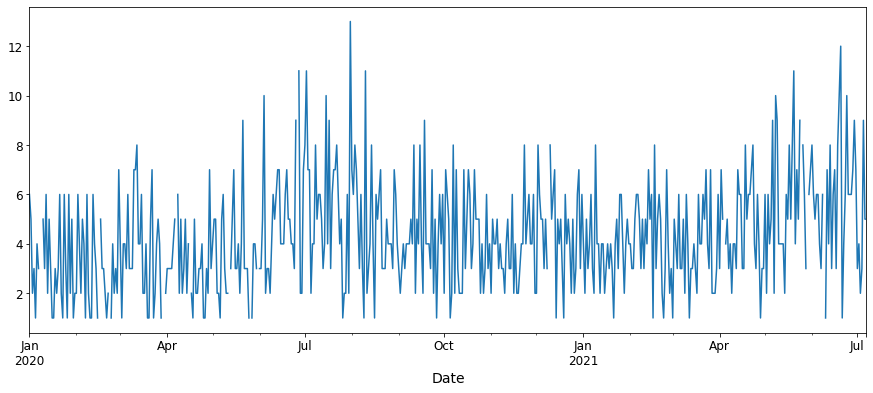

In [ ]:

y.plot(figsize=(15, 6))
plt.show()

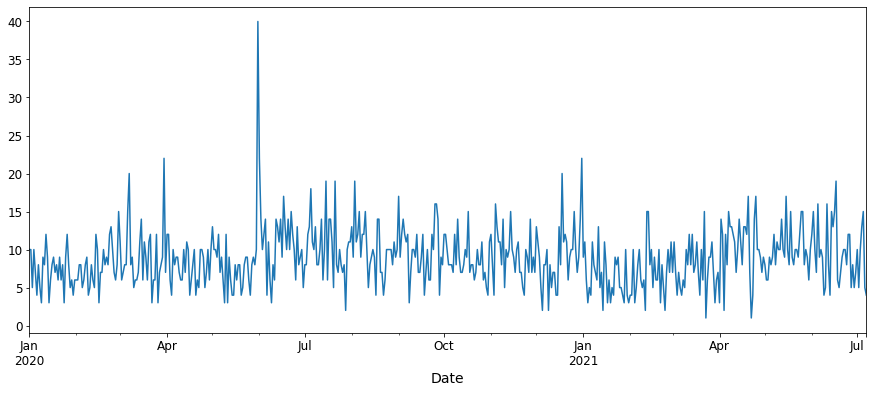

In [ ]:
## plotting the daily crime of vandalism to check time series continuity 
z.plot(figsize=(15, 6))
plt.show()

It has been seen that time-series for verbal dispute has discontinuity so suitable interpolation technique has been used to replace the missing data and make the time-series continuous.

* **Missing values have been interpolated from spline method of order 2. for both types of crime**

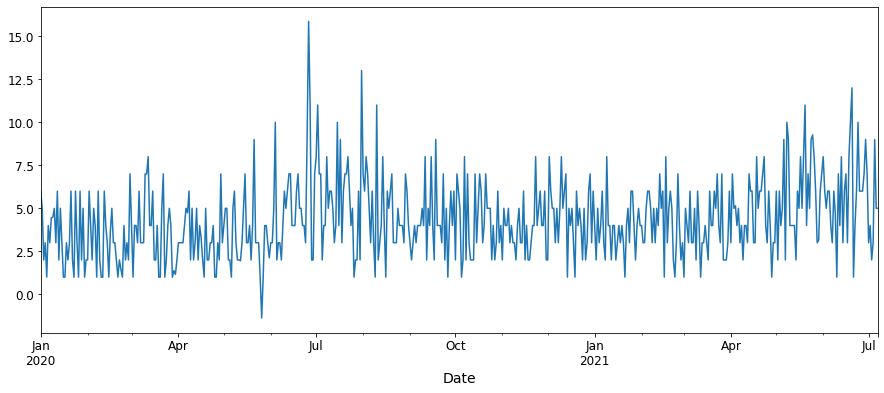

In [ ]:

interpolated = y.interpolate(method='spline', order=2)
# print(interpolated.head(32))
interpolated.plot(figsize=(15, 6))
plt.show()

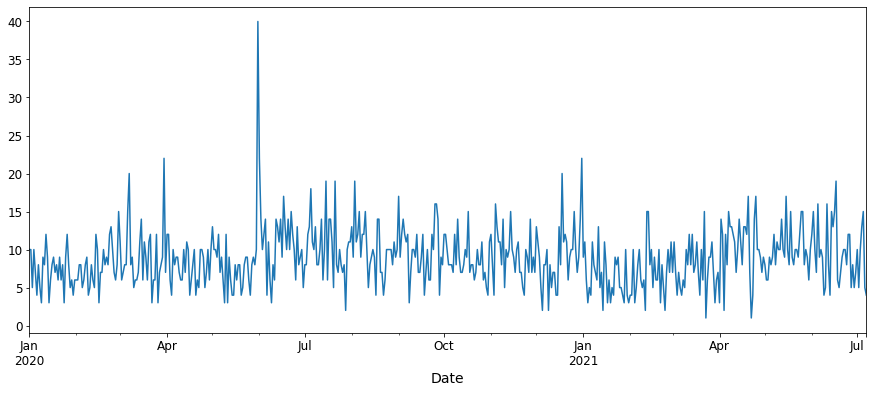

In [ ]:
## missing values have ben interpolated from spline method of order 2. for verbal dispute crime
interpolated_z = z.interpolate(method='spline', order=2)
# print(interpolated.head(32))
interpolated_z.plot(figsize=(15, 6))
plt.show()

* **SARIMA Time Series Analysis on Crime Data**

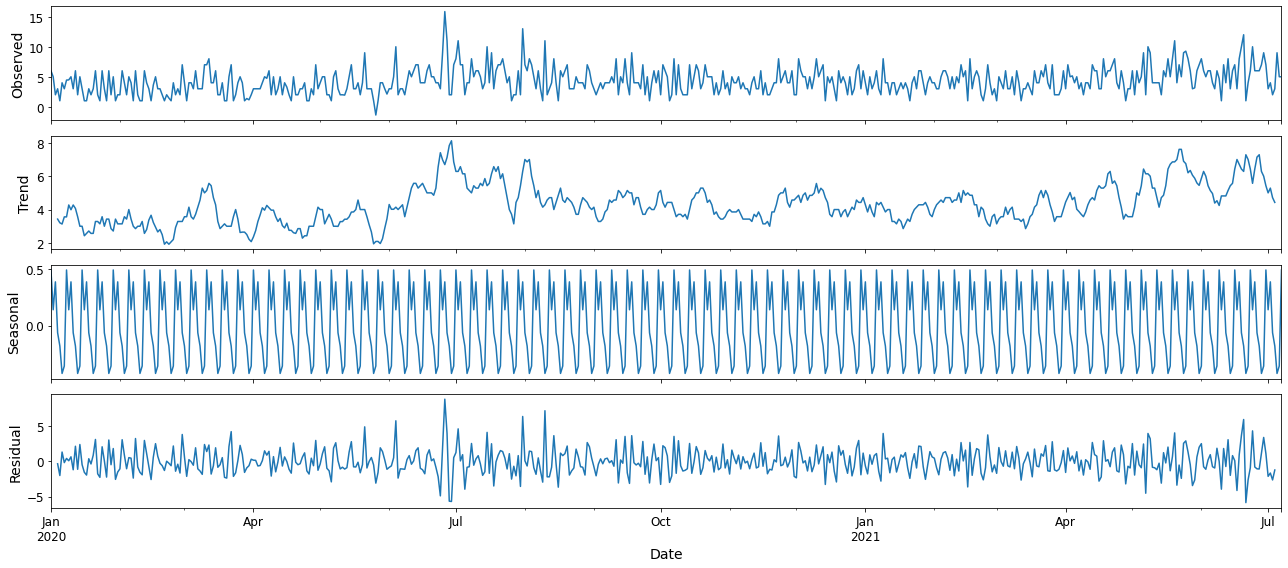

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
## Additive Decomposition
decomposition = sm.tsa.seasonal_decompose(interpolated, model='additive')
print(decomposition)
fig = decomposition.plot()
plt.show()

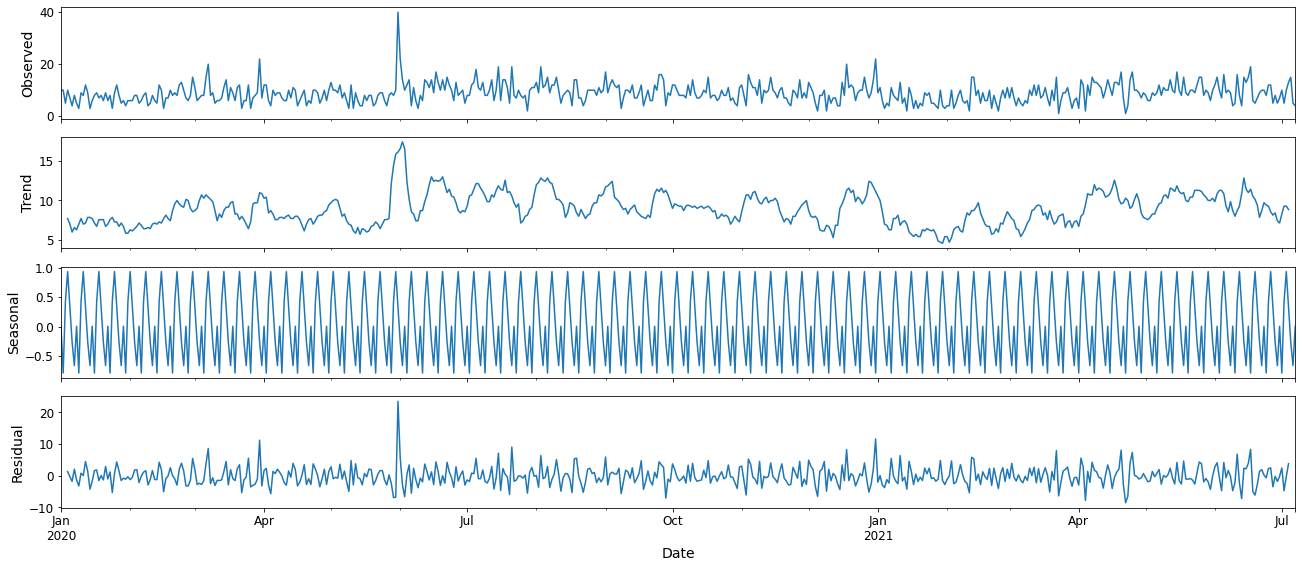

In [ ]:
decomposition_z = sm.tsa.seasonal_decompose(interpolated_z, model='additive')
print(decomposition_z)
fig = decomposition_z.plot()
plt.show()

* **Fit the SARIMA model for Future Prediction** 

SARIMA could exhibit non-stationary properties and seasonality of a time series model by combining simpler models to a complex one. Autoregression model AR(p)
is a regression of the time series onto itself and it has been assumed that the current value would depend on its previous values considering some amount of lag. The parameter, p  represents the maximum lag which could be defined from the partial autocorrelation plot by identifing the prime lag after following other lags are not significant. The moving average model MA(q) represents the biggest lag after which other lags are not significant on the autocorrelation plot. The order of integration I(d) where parameter, d represents the number of differences required to make the series stationary. Combining all, SARIMA(p, d, q) model is formed.

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(interpolated,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3314.7594667954704
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2940.222802372878
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2653.6913297729943
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2354.2079109125643
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2618.2078139884734
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2402.6150884280564
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2493.7950520346944
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2356.206655768996
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3004.3623425784263
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2780.4100218946896
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2646.5231766000506
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2335.614495024562
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2602.7448686051252
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2386.9425794211356
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2487.2801617223413
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2337.613048457978
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2707.482713067346
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2650.51432771485

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2342.08472188826
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2399.9430408256185
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2352.1167263128737
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2647.002396673474
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2319.816282721162


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2355.2826036590727
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2352.064197907932
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2485.4507899847404
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2321.816278427008
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2583.399624742509
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2533.2204807468356
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2863.407807521806
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2499.63508665834
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2532.631460908461
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2530.859681691382
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2673.736447188856
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2501.635082502736
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2392.5917011753522
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2344.8986509257425
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2650.379350914679
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2312.5724766142266
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2348.4273060112746
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2344.6710102095167
ARI

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_z = sm.tsa.statespace.SARIMAX(interpolated_z,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results_z = mod_z.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_z.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4081.581508400982
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3692.351752037589
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3320.7834996837714
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2960.52938663762
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3288.6545561253843
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3031.0408881256735
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3110.603729054834
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2962.2879989357034
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3695.4494467325308
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3469.081161417263
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3297.062705809304
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2928.255714085064
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3257.210170311412
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3000.3731115930636
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3093.6742043780096
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2930.0601671225595
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3277.3031784714913
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3210.9970196610043
A

In [ ]:
mod = sm.tsa.statespace.SARIMAX(interpolated,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
## printing out the summary of the model
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1270      0.041      3.076      0.002       0.046       0.208
ma.L1         -1.0000      9.671     -0.103      0.918     -19.954      17.954
ar.S.L12      -0.4572      0.037    -12.520      0.000      -0.529      -0.386
sigma2         6.3289     61.270      0.103      0.918    -113.758     126.416


In [ ]:
mod_z = sm.tsa.statespace.SARIMAX(interpolated_z,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_z = mod_z.fit()
## printing out the summary of the model
print(results_z.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1964      0.037      5.345      0.000       0.124       0.268
ma.L1         -1.0000      7.027     -0.142      0.887     -14.773      12.773
ar.S.L12      -0.4962      0.028    -17.823      0.000      -0.551      -0.442
sigma2        19.8191    139.199      0.142      0.887    -253.006     292.644


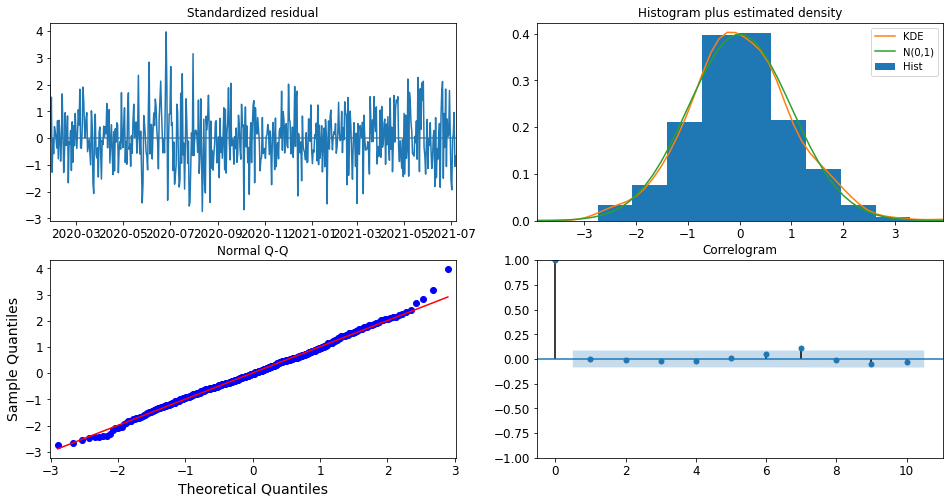

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

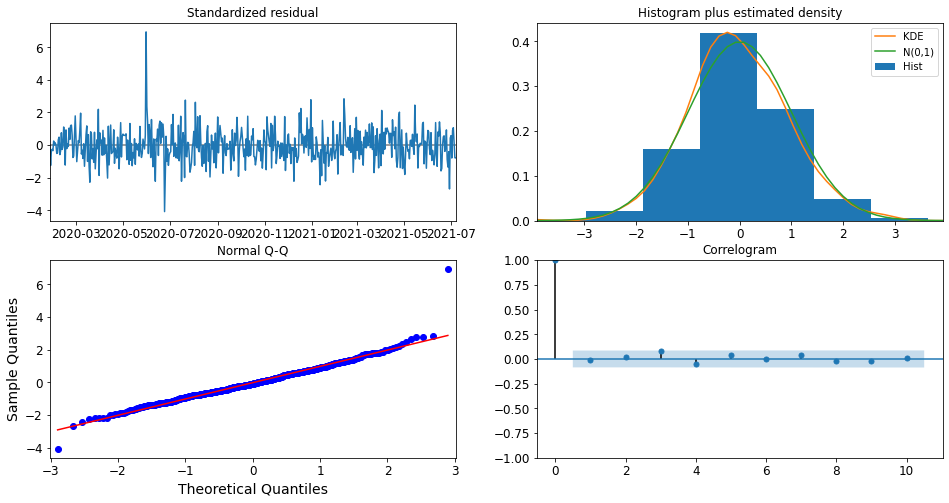

In [ ]:
results_z.plot_diagnostics(figsize=(16, 8))
plt.show()

The time series is stationary from the correlation plot and and prepared for forecasts!  Otherwise, one should apply transformations to time series data to remove seasonality and any non-stationary behaviors.




## **Results**

* **Prediction on 01/01/21-07/09/2021**

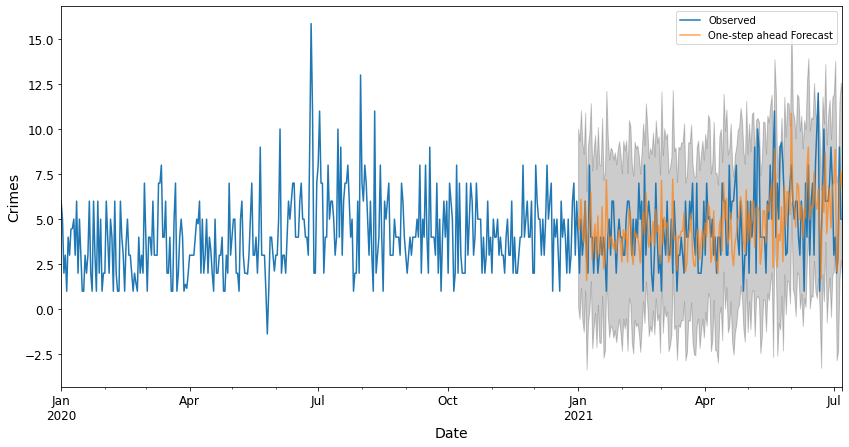

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = interpolated['2020':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crimes')
plt.legend()

plt.show()

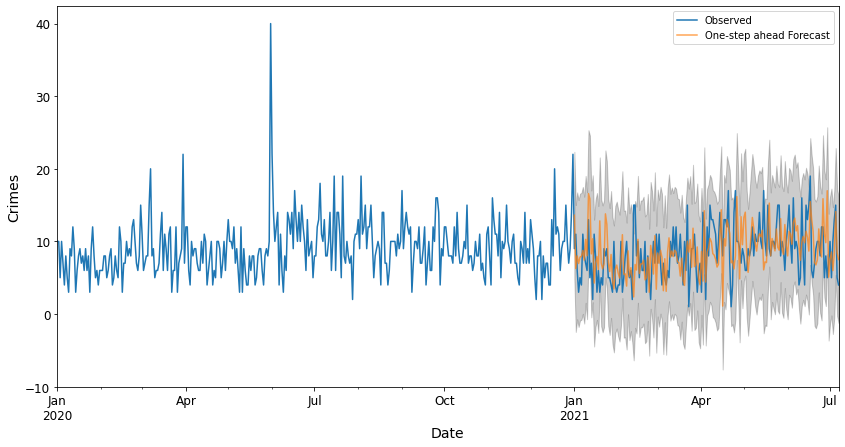

In [ ]:
pred_z = results_z.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci_z = pred_z.conf_int()

ax_z = interpolated_z['2020':].plot(label='Observed')
pred_z.predicted_mean.plot(ax=ax_z, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax_z.fill_between(pred_ci_z.index,
                pred_ci_z.iloc[:, 0],
                pred_ci_z.iloc[:, 1], color='k', alpha=.2)

ax_z.set_xlabel('Date')
ax_z.set_ylabel('Crimes')
plt.legend()

plt.show()

Prediction on One-step ahead has been done to verify whether the prediction has the similar trend with the original data. It seems the prediction from 01/01/21 has been quite at par with the original data so that the forecast could be proceeded on the 07/21-12/21. 

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = interpolated['2021-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of verbal dispute forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of verbal dispute forecasts is 5.89


In [ ]:
z_forecasted = pred_z.predicted_mean
z_truth = interpolated_z['2021-01-01':]

# Compute the mean square error
mse_z = ((z_forecasted - z_truth) ** 2).mean()
print('The Mean Squared Error of vandalism forecasts is {}'.format(round(mse_z, 2)))

The Mean Squared Error of vandalism forecasts is 17.83


In [ ]:
print('The Root Mean Squared Error of verbal dispute forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The Root Mean Squared Error of vandalism forecasts is {}'.format(round(np.sqrt(mse_z), 2)))

The Root Mean Squared Error of verbal dispute forecasts is 2.43
The Root Mean Squared Error of vandalism forecasts is 4.22


RMSE error on the one-step-ahead forcasts were as optimal as 2.43 and 4.22 for both the crime series prediction.

* **Forecast on the future 180 days**

Fprecasting the crime data for the next 180 days has been shown in following two plots. As the forcasting period increases uncertainity in forecast also increases and accuracy rate decreases.Predicted forecasts along with upper and lower forcasting interval with 95% confidence rate have been also shown in the follwoing plots. 

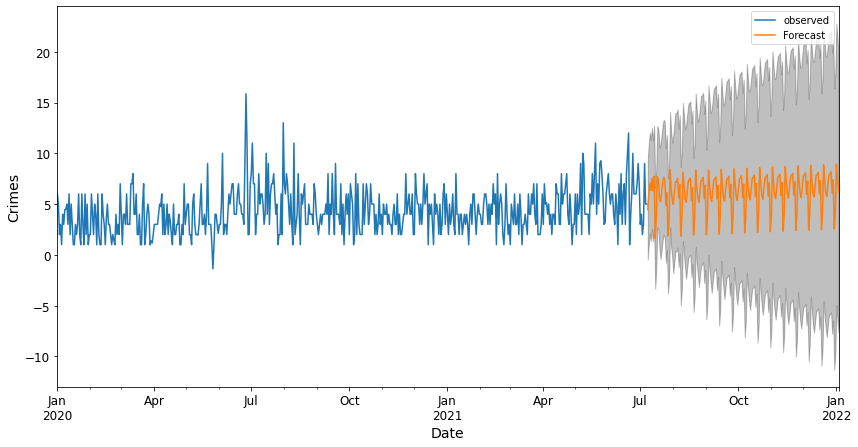

In [ ]:
pred_uc = results.get_forecast(steps=180)
pred_ci = pred_uc.conf_int()

ax = interpolated.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crimes')

plt.legend()
plt.show()

In [ ]:
predicted_verbal = pd.DataFrame(pred_uc.predicted_mean, columns=['VERBAL DISPUTE'])
predicted_verbal['UpperLimit_verbal']=pred_ci['upper Crime']
predicted_verbal['LowerLimit_verbal']=pred_ci['lower Crime']
predicted_verbal.head()

,VERBAL DISPUTE,UpperLimit_verbal,LowerLimit_verbal
2021-07-08,4.457509,9.392921,-0.477903
2021-07-09,6.050576,11.026784,1.074368
2021-07-10,7.078687,12.055698,2.101675
2021-07-11,6.338912,11.315955,1.361868
2021-07-12,7.539934,12.516980,2.562887


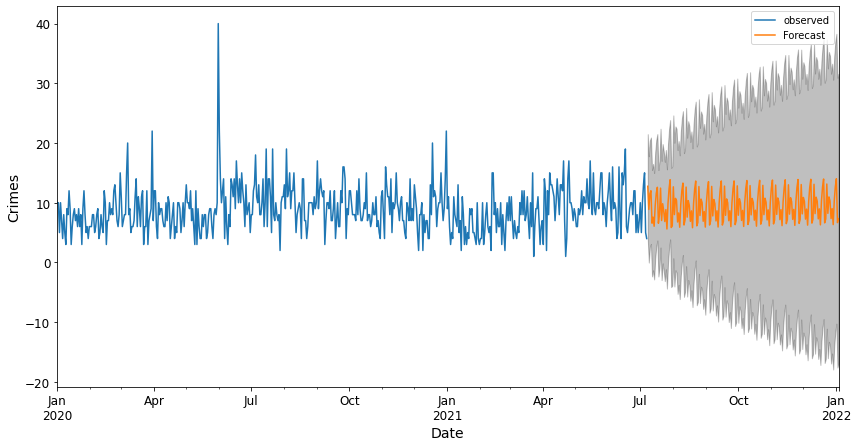

In [ ]:
pred_uc_z = results_z.get_forecast(steps=180)
pred_ci_z = pred_uc_z.conf_int()

ax_z = interpolated_z.plot(label='observed', figsize=(14, 7))
pred_uc_z.predicted_mean.plot(ax=ax_z, label='Forecast')
ax_z.fill_between(pred_ci_z.index,
                pred_ci_z.iloc[:, 0],
                pred_ci_z.iloc[:, 1], color='k', alpha=.25)
ax_z.set_xlabel('Date')
ax_z.set_ylabel('Crimes')

plt.legend()
plt.show()

In [ ]:
predicted_vandal = pd.DataFrame(pred_uc_z.predicted_mean, columns=['VANDALISM'])
predicted_vandal['UpperLimit_vandal']=pred_ci_z['upper Crime']
predicted_vandal['LowerLimit_vandal']=pred_ci_z['lower Crime']
predicted_vandal.head()

,VANDALISM,UpperLimit_vandal,LowerLimit_vandal
2021-07-08,12.749749,21.483487,4.016012
2021-07-09,8.877252,17.781003,-0.026499
2021-07-10,11.507992,20.418857,2.597126
2021-07-11,12.006441,20.917702,3.095180
2021-07-12,6.568091,15.479391,-2.343210


* **Extracting the results as the required table format for saving and downloading purposes**

In [ ]:
crime_pred = predicted_verbal.copy()
crime_pred = crime_pred.drop(columns =['UpperLimit_verbal', 'LowerLimit_verbal'])
crime_pred['VERBAL DISPUTE']=predicted_verbal['VERBAL DISPUTE']
crime_pred['VANDALISM']=predicted_vandal['VANDALISM']
crime_pred.reset_index(inplace=True)
crime_pred = crime_pred.rename(columns = {'index':'Date'})
crime_pred.head()

,Date,VERBAL DISPUTE,VANDALISM
0,2021-07-08,4.457509,12.749749
1,2021-07-09,6.050576,8.877252
2,2021-07-10,7.078687,11.507992
3,2021-07-11,6.338912,12.006441
4,2021-07-12,7.539934,6.568091


In [ ]:
# saving the dataframe
crime_pred.to_csv('crime_pred(SARIMA).csv')
# dowloading the file
from google.colab import files
files.download('crime_pred(SARIMA).csv')  ## downloads the file to harddrive

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Exploring the time series forecast using Prophet library**

Preprocessed and cleaned time-series crime data has been fed into prophet model to interpret the forecast of future 180 days with an interval width of 95%.   

In [ ]:
from fbprophet import Prophet

crime_verbal_g3 = crime_verbal_g1.rename(columns={'Date': 'ds', 'Crime': 'y'})
crime_verbal_model = Prophet(interval_width=0.95)
crime_verbal_model.fit(crime_verbal_g3)
crime_verbal_forecast = crime_verbal_model.make_future_dataframe(periods=180, freq='D')
crime_verbal_forecast = crime_verbal_model.predict(crime_verbal_forecast)

crime_vandalism_g3 = crime_vandalism_g1.rename(columns={'Date': 'ds', 'Crime': 'y'})
crime_vandalism_model = Prophet(interval_width=0.95)
crime_vandalism_model.fit(crime_vandalism_g3)
crime_vandalism_forecast = crime_vandalism_model.make_future_dataframe(periods=180, freq='D')
crime_vandalism_forecast = crime_vandalism_model.predict(crime_vandalism_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Results**
* **Predicted crime rates have been plotted with suitable confidence interval**

<Figure size 1296x432 with 0 Axes>

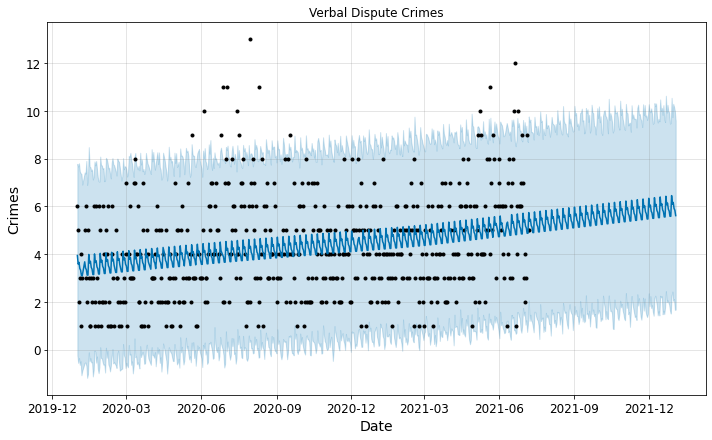

In [ ]:
plt.figure(figsize=(18, 6))
crime_verbal_model.plot(crime_verbal_forecast, xlabel = 'Date', ylabel = 'Crimes')
plt.title('Verbal Dispute Crimes');

<Figure size 1296x432 with 0 Axes>

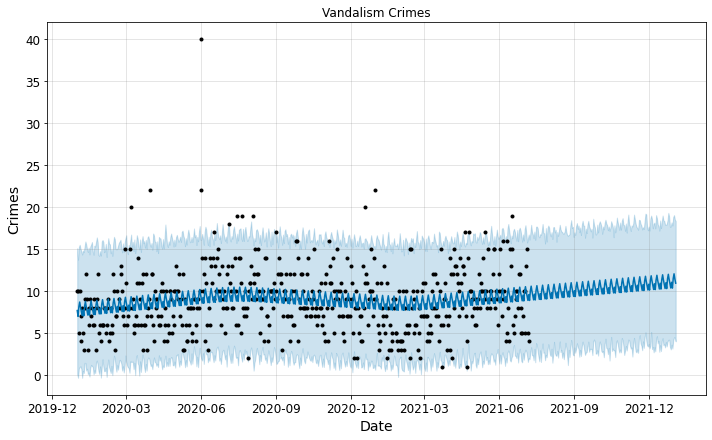

In [ ]:
plt.figure(figsize=(18, 6))
crime_vandalism_model.plot(crime_vandalism_forecast, xlabel = 'Date', ylabel = 'Crimes')
plt.title('Vandalism Crimes');

* **Merging the prediction dataframe for both the crime series**

In [ ]:
crime_verbal_names = ['crime_verbal_%s' % column for column in crime_verbal_forecast.columns]
crime_vandalism_names = ['vandalism_%s' % column for column in crime_vandalism_forecast.columns]

merge_crime_verbal_forecast = crime_verbal_forecast.copy()
merge_crime_vandalism_forecast = crime_vandalism_forecast.copy()

merge_crime_verbal_forecast.columns = crime_verbal_names
merge_crime_vandalism_forecast.columns = crime_vandalism_names

forecast = pd.merge(merge_crime_verbal_forecast, merge_crime_vandalism_forecast, how = 'inner', left_on = 'crime_verbal_ds', right_on = 'vandalism_ds')

forecast = forecast.rename(columns={'crime_verbal_ds': 'Date'}).drop('vandalism_ds', axis=1)
forecast.head()

,Date,crime_verbal_trend,crime_verbal_yhat_lower,crime_verbal_yhat_upper,crime_verbal_trend_lower,crime_verbal_trend_upper,crime_verbal_additive_terms,crime_verbal_additive_terms_lower,crime_verbal_additive_terms_upper,crime_verbal_weekly,crime_verbal_weekly_lower,crime_verbal_weekly_upper,crime_verbal_multiplicative_terms,crime_verbal_multiplicative_terms_lower,crime_verbal_multiplicative_terms_upper,crime_verbal_yhat,vandalism_trend,vandalism_yhat_lower,vandalism_yhat_upper,vandalism_trend_lower,vandalism_trend_upper,vandalism_additive_terms,vandalism_additive_terms_lower,vandalism_additive_terms_upper,vandalism_weekly,vandalism_weekly_lower,vandalism_weekly_upper,vandalism_multiplicative_terms,vandalism_multiplicative_terms_lower,vandalism_multiplicative_terms_upper,vandalism_yhat
0,2020-01-01,3.433233,-0.245600,7.784846,3.433233,3.433233,0.508441,0.508441,0.508441,0.508441,0.508441,0.508441,0.0,0.0,0.0,3.941674,7.719944,0.059285,15.095240,7.719944,7.719944,-0.037733,-0.037733,-0.037733,-0.037733,-0.037733,-0.037733,0.0,0.0,0.0,7.682211
1,2020-01-02,3.436455,-0.556589,7.673920,3.436455,3.436455,0.146725,0.146725,0.146725,0.146725,0.146725,0.146725,0.0,0.0,0.0,3.583180,7.730079,-0.335144,13.751920,7.730079,7.730079,-0.742395,-0.742395,-0.742395,-0.742395,-0.742395,-0.742395,0.0,0.0,0.0,6.987684
2,2020-01-03,3.439677,-0.356660,7.809227,3.439677,3.439677,0.215477,0.215477,0.215477,0.215477,0.215477,0.215477,0.0,0.0,0.0,3.655154,7.740214,0.785411,15.257391,7.740214,7.740214,0.406207,0.406207,0.406207,0.406207,0.406207,0.406207,0.0,0.0,0.0,8.146421
3,2020-01-04,3.442899,-0.639585,7.462698,3.442899,3.442899,-0.043505,-0.043505,-0.043505,-0.043505,-0.043505,-0.043505,0.0,0.0,0.0,3.399394,7.750349,0.951870,15.519676,7.750349,7.750349,0.947144,0.947144,0.947144,0.947144,0.947144,0.947144,0.0,0.0,0.0,8.697493
4,2020-01-05,3.446121,-0.490776,7.393117,3.446121,3.446121,-0.122023,-0.122023,-0.122023,-0.122023,-0.122023,-0.122023,0.0,0.0,0.0,3.324098,7.760484,1.035398,15.046558,7.760484,7.760484,0.323207,0.323207,0.323207,0.323207,0.323207,0.323207,0.0,0.0,0.0,8.083691


* Plotting the trend for both the predicted crimes

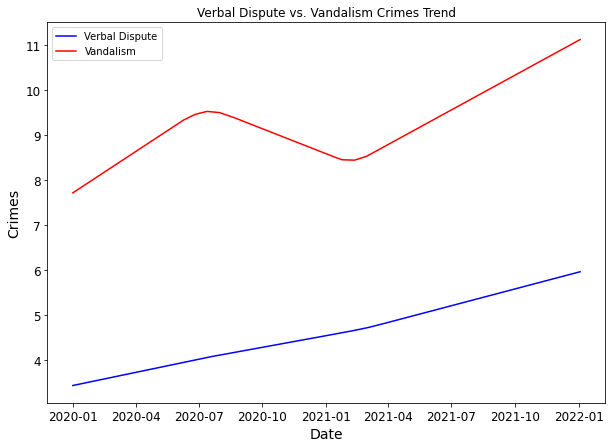

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['crime_verbal_trend'], 'b-', label='Verbal Dispute')
plt.plot(forecast['Date'], forecast['vandalism_trend'], 'r-', label="Vandalism")
plt.xlabel('Date'); plt.ylabel('Crimes')
plt.title('Verbal Dispute vs. Vandalism Crimes Trend');
plt.legend(); 

* Plotting the estimation for both the predicted crimes

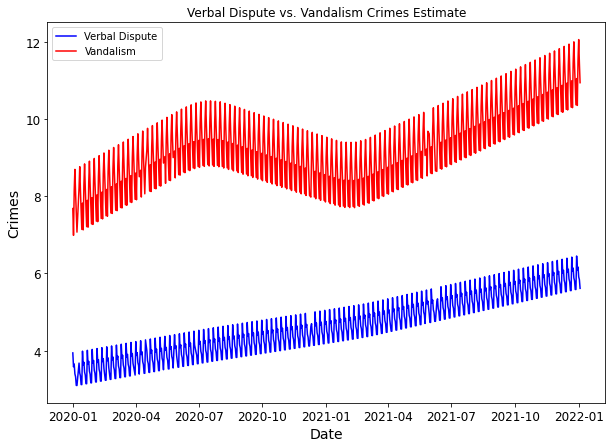

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['crime_verbal_yhat'], 'b-', label='Verbal Dispute')
plt.plot(forecast['Date'], forecast['vandalism_yhat'], 'r-', label="Vandalism")
plt.legend(); plt.xlabel('Date'); plt.ylabel('Crimes')
plt.title('Verbal Dispute vs. Vandalism Crimes Estimate');

* Plotting the daily and weekly trends for both the predicted crimes

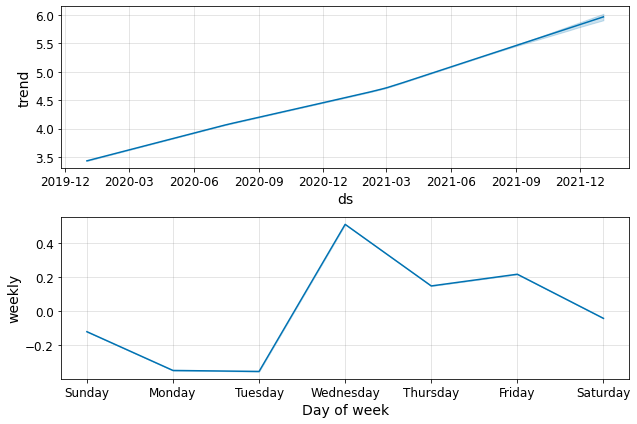

In [ ]:
crime_verbal_model.plot_components(crime_verbal_forecast)
plt.show()

In [ ]:
crime_verbal_forecast.head()
type(crime_verbal_forecast)

pandas.core.frame.DataFrame

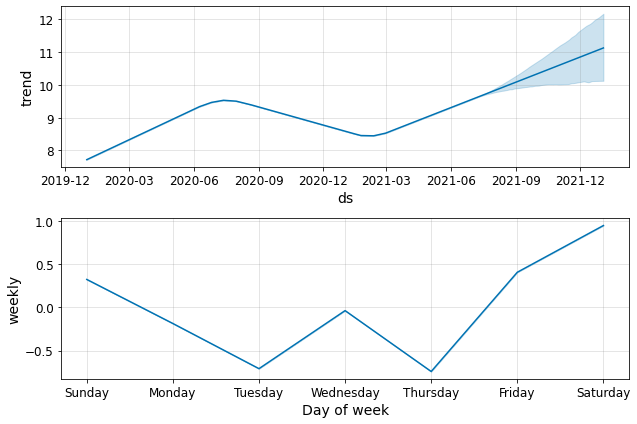

In [ ]:
crime_vandalism_model.plot_components(crime_vandalism_forecast);
plt.show()

* **Extracting the results as the required table format for saving and downloading purposes**

In [ ]:
crime_pred1 = pd.DataFrame()
crime_pred1['Date']=crime_verbal_forecast['ds']
crime_pred1['VERBAL DISPUTE']=crime_verbal_forecast['yhat']
crime_pred1['VANDALISM']=crime_vandalism_forecast['yhat']
start_date = "2021-7-9"
end_date = "2021-12-31"

after_start_date = crime_pred1["Date"] >= start_date
before_end_date = crime_pred1["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
crime_pred_p = crime_pred1.loc[between_two_dates]
crime_pred_p.head()

,Date,VERBAL DISPUTE,VANDALISM
538,2021-07-09,5.456350,8.779600
539,2021-07-10,5.201433,9.459830
540,2021-07-11,5.126980,8.763587
541,2021-07-12,4.903406,9.920608
542,2021-07-13,4.901679,10.469965


In [ ]:
# saving the dataframe to csv file
crime_pred_p.to_csv('crime_pred(Prophet).csv')
# dowloading the file to local harddrive
from google.colab import files
files.download('crime_pred(Prophet).csv') ## downloads the file to local harddrive 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**References**

1. https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775